<a href="https://colab.research.google.com/github/financieras/dataframe/blob/main/2024/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3
Ahora nos toca un poco de estadística.

A Winston Churchill (¿quién era Winston Churchill?), se le atribuye la sentencia que él solo se fía de las estadísticas que el mismo ha trucado. Nosotros desde luego no hemos falsificado nada, pero la verdad es que siempre hay muchas formas de crear estadísticas, y por esto es importante echar un vistazo a los datos que utilizamos, y pensar si el promedio es el método adecuado, o si preferimos aplicar la mediana.

En realidad, nos hemos saltado unos pasos importantes en la exploración de los datos. Siempre hay que comprobar si los datos son completos (en nuestro caso lo son) y si hay valores atípicos que cambian los resultados, sobre todo cuando trabajamos con el promedio.

Os doy un ejemplo:

Queremos saber cuál es el país más rico, el país A o el país B. Lo primero que hacemos es fijarnos en el PIB (¿qué es el PIB?). Entonces, el país B es el más rico. No obstante, si tomamos en cuenta que el país B es mucho más grande, esto cambia. Si dividimos el PiB por el número de habitantes, resulta que el país A sale mucho mejor parado. Esto significa que los habitantes del país A son más ricos?

Depende: en el país A hay una persona muy rica, y el resto es bastante pobre. Esto hace que casi todo el mundo dispone de mucho menos que la renta media, es decir el valor atípico (la persona rica) afecta mucho el promedio. Entonces aplicamos la mediana en vez del promedio, y vemos que el valor mediano en el país A es mucho más bajo que en el país B, mientras el promedio es más alto en A que en B.

### Ejemplo

| Indicador   | País A        | País B        |
|-------------|--------------|---------------|
| PIB         | 1000         | 2000          |
| Habitantes  | 10           | 40            |
| Media       | 100/hab.     | 50/hab.       |
| H1          | 700          | 200           |
| H2          | 100          | 100           |
| H3-H8       | 30           | 50            |
| H9-H10      | 10           | -             |
| H31-H40     | -            | 10            |
| Mediana     | 30           | 50            |


#### Notación de la tabla
La notación H1, H2, ..., H40 representa magnitudes asociadas a la distribución de la renta, donde cada H indica un grupo o individuo dentro una muestra ordenada por ingresos (por ejemplo, H1 sería el que más renta tiene, H40 el de menor renta en una muestra de 40 habitantes). Esto se utiliza en tablas que resumen cómo está repartido el PIB entre los distintos habitantes o grupos del país, indicando cuánto recibe cada uno.

- H1: Puede representar el individuo o grupo con mayor ingreso o renta dentro del país, según la distribución ordenada del PIB per cápita.
- H40: Sería el individuo o grupo de menor renta si se tienen 40 habitantes y se han ordenado de mayor a menor según ingresos.

Esta notación suele usarse cuando se analiza desigualdad económica, por ejemplo mostrando la concentración de riqueza en los primeros (H1, H2) frente al resto (H3-H40), y permite calcular indicadores como la mediana, la media y visualizar la distribución de la renta de manera sencilla.

Resulta que con el promedio gana el país A porque hay un habitante con una renta muy alta, y con la mediana el  país B, porque en el cálculo de la mediana el habitante superrico del país A ya no tiene tanto peso. Al final y al cabo, tenemos que decidir si utilizamos el PIB, el promedio de la renta per cápita, o el valor mediano de renta per cápita, para sacar nuestras conclusiones.

## Introducción a la Task 3.1
> A ver qué pasa si utilizamos la mediana en vez del promedio.

**Añadir a la tabla de la Task 2.2. una columna con la mediana de candidatos, y crea el scatterplot de task 2.3 basado en el valor mediano de candidatos.**

Ahora, nos toca investigar si en el caso de los candidatos queremos aplicar el promedio (tal y como lo hemos hecho) o la mediana. Es interesante ver que, en algunas tecnologías, el valor promedio y mediano varía bastante. Juega con la nueva tabla, ordenándola según el promedio, y la mediana, y compara el scatterplot con el promedio con el scatterplot con la mediana.

# Preguntas Task 3.1.
¿Cuáles de las siguientes tecnologías (Git, Java, Python y Windows) mejora su posición con respecto al resto si se aplica la mediana en vez del promedio?

Esta es la pregunta tal y como aparece en el test:

¿Cuáles de las siguientes tecnologías mejoran su posición con respecto al resto si se aplica la mediana en vez del promedio?
Select one or more:

- ☐ Linux
- ☐ Python
- ☐ SQL
- ☐ Java

In [ ]:
!git clone https://github.com/financieras/dataframe.git

Cloning into 'dataframe'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 126 (delta 69), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (126/126), 1008.27 KiB | 6.68 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [ ]:
# Código completo para la Task 3.1, sin depender de seaborn
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Cargar el dataset
df = pd.read_csv('/content/dataframe/2024/dataset_Modul0_2024.csv')

# ---
# Paso 1: Crear una columna 'skill_list' de forma segura y consistente.
# ---
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []  # En caso de error, devolvemos una lista vacía

# Parsear y normalizar las habilidades
df['skill_list'] = df['Skills'].apply(safe_literal_eval)
df['skill_list'] = df['skill_list'].apply(lambda lst: [s.strip().lower() for s in lst])

# ---
# Paso 2: Explotar la lista de habilidades y quedarnos con las top 50.
# ---
skills_exploded = df.explode('skill_list')
top_skills = skills_exploded['skill_list'].value_counts().head(50).index

# Filtramos el dataframe explotado para solo las top 50 tecnologías.
df_top50 = skills_exploded[skills_exploded['skill_list'].isin(top_skills)]

# ---
# Paso 3: Calcular la media y la mediana de candidatos para cada tecnología.
# ---
df_stats = df_top50.groupby('skill_list').agg(
    Count=('skill_list', 'size'),
    Cand_mean=('Candidates', 'mean'),
    Cand_median=('Candidates', 'median')
).reset_index()

# Redondeamos para facilitar la lectura.
df_stats['Cand_mean'] = df_stats['Cand_mean'].round(1)
df_stats['Cand_median'] = df_stats['Cand_median'].round(1)

# ---
# Paso 4: Responder a la pregunta de la Task 3.1.
# Comparamos la media y la mediana para las tecnologías dadas.
# Una tecnología "mejora su posición" si su mediana es menor que su media.
# ---
tecnologias_pregunta = ['linux', 'python', 'sql', 'java']

print("Análisis para la Task 3.1:")
print("Una tecnología mejora su posición si su mediana de candidatos es menor que su media.\n")

mejoran = []
for tech in tecnologias_pregunta:
    if tech in df_stats['skill_list'].values:
        row = df_stats[df_stats['skill_list'] == tech].iloc[0]
        mejora = row['Cand_median'] < row['Cand_mean']
        if mejora:
            mejoran.append(tech.capitalize())

        print(f"- {tech.capitalize()}:")
        print(f"    Media de candidatos: {row['Cand_mean']}")
        print(f"    Mediana de candidatos: {row['Cand_median']}")
        print(f"    ¿Mejora con la mediana en términos absolutos? {'Sí' if mejora else 'No'}")
        print()
    else:
        print(f"- {tech.capitalize()}: No está en el top 50 de tecnologías.\n")


Análisis para la Task 3.1:
Una tecnología mejora su posición si su mediana de candidatos es menor que su media.

- Linux:
    Media de candidatos: 43.5
    Mediana de candidatos: 17.0
    ¿Mejora con la mediana en términos absolutos? Sí

- Python:
    Media de candidatos: 36.4
    Mediana de candidatos: 14.0
    ¿Mejora con la mediana en términos absolutos? Sí

- Sql:
    Media de candidatos: 29.4
    Mediana de candidatos: 15.0
    ¿Mejora con la mediana en términos absolutos? Sí

- Java:
    Media de candidatos: 52.8
    Mediana de candidatos: 16.0
    ¿Mejora con la mediana en términos absolutos? Sí



La pregunta que nos haces nos piden identificar las tecnologías que mejoran en términos relativos, justo cuando dicen "con respecto al resto".

Por lo tanto, tenemos que crear un RANKING.

In [ ]:
import pandas as pd
import ast

# Cargar datos
df = pd.read_csv('/content/dataframe/2024/dataset_Modul0_2024.csv')

# Parsear y normalizar habilidades
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

df['skill_list'] = df['Skills'].apply(safe_literal_eval)
df['skill_list'] = df['skill_list'].apply(lambda lst: [s.strip().lower() for s in lst])

# Explotar y tomar top 50
skills_exploded = df.explode('skill_list')
top_skills = skills_exploded['skill_list'].value_counts().head(50).index
df_top50 = skills_exploded[skills_exploded['skill_list'].isin(top_skills)]

# Agregar estadísticas
df_stats = df_top50.groupby('skill_list').agg(
    Count=('skill_list', 'size'),
    Cand_mean=('Candidates', 'mean'),
    Cand_median=('Candidates', 'median')
).reset_index()

# Crear rankings (1 = mejor, valor más bajo de candidatos)
df_stats = df_stats.sort_values('Cand_mean').reset_index(drop=True)
df_stats['rank_mean'] = df_stats.index + 1

df_stats = df_stats.sort_values('Cand_median').reset_index(drop=True)
df_stats['rank_median'] = df_stats.index + 1

# Ahora, para cada tecnología, ver si mejora su ranking
tecnologias = ['linux', 'python', 'sql', 'java']
print("Task 3.1: ¿Mejora la posición relativa al usar mediana en vez de media?\n")

mejoran = []
for tech in tecnologias:
    if tech in df_stats['skill_list'].values:
        row = df_stats[df_stats['skill_list'] == tech].iloc[0]
        rank_mean = row['rank_mean']
        rank_median = row['rank_median']
        mejora = rank_median < rank_mean  # sube en el ranking (número más bajo)
        if mejora:
            mejoran.append(tech.capitalize())

        print(f"- {tech.capitalize()}:")
        print(f"    Ranking con media: {rank_mean}")
        print(f"    Ranking con mediana: {rank_median}")
        print(f"    ¿Mejora posición relativa? {'Sí' if mejora else 'No'}")
        print()
    else:
        print(f"- {tech.capitalize()}: No está en el top 50.\n")

print("=== RESPUESTA FINAL ===")
print("Tecnologías que mejoran su posición *con respecto al resto*:")
for t in mejoran:
    print(f"☑️  {t}")

Task 3.1: ¿Mejora la posición relativa al usar mediana en vez de media?

- Linux:
    Ranking con media: 35
    Ranking con mediana: 34
    ¿Mejora posición relativa? Sí

- Python:
    Ranking con media: 26
    Ranking con mediana: 21
    ¿Mejora posición relativa? Sí

- Sql:
    Ranking con media: 21
    Ranking con mediana: 23
    ¿Mejora posición relativa? No

- Java:
    Ranking con media: 39
    Ranking con mediana: 27
    ¿Mejora posición relativa? Sí

=== RESPUESTA FINAL ===
Tecnologías que mejoran su posición *con respecto al resto*:
☑️  Linux
☑️  Python
☑️  Java


la interpretación correcta de la pregunta es la relativa (ranking), no la absoluta (media vs mediana).

Vamos a desglosar por qué **SQL no mejora su posición *con respecto al resto***, a pesar de que su mediana sea mucho menor que su media.

---

### 📊 Tus resultados para SQL:

- **Media**: 29.4  
- **Mediana**: 15.0  
- **Ranking con media**: 21.º  
- **Ranking con mediana**: 23.º  

✅ **Sí, su mediana < media** → esto significa que **en términos absolutos**, usar la mediana hace que SQL parezca **menos saturado** (solo 15 candidatos típicos en lugar de 29.4 en promedio).  
❌ **Pero su ranking empeora**: pasa de la **posición 21** a la **23**.

---

### ❓ ¿Cómo es posible que empeore el ranking si la mediana es más baja?

Porque **el ranking depende de cómo se mueven *todas las demás tecnologías***.

Cuando cambias de **media → mediana**, **no solo cambia el valor de SQL**, sino **el de las otras 49 tecnologías del top 50**.

#### Escenario probable:
- Tecnologías como **Python** y **Java** tienen **outliers mucho más extremos** que SQL.
  - Ej: Python tiene algunas ofertas con **miles** de candidatos, lo que infla su media a, digamos, 100, pero su mediana es 20.
  - Al pasar a mediana, **Python "cae" mucho más en valor absoluto** que SQL (de 100 → 20, una caída de 80 puntos).
- Mientras tanto, SQL solo cae de 29.4 → 15.0 (caída de ~14 puntos).
- Pero **otras tecnologías** (quizá más especializadas o con distribuciones más simétricas) **cambian poco**.
- Entonces, al reordenar **todas juntas**, **algunas tecnologías que antes estaban por debajo de SQL (peor ranking) ahora tienen valores de mediana aún más bajos que los 15.0 de SQL**, y **la adelantan**.

#### Ejemplo ilustrativo:
Supón que antes (con media):
- Tecnología X: media = 30 → **posición 22**
- **SQL**: media = 29.4 → **posición 21**
- Tecnología Y: media = 29 → **posición 20**

Después (con mediana):
- Tecnología X: mediana = **14** → ahora está **por delante** de SQL
- **SQL**: mediana = 15 → **posición 23**
- Tecnología Y: mediana = **14.5** → también por delante

→ Aunque SQL mejoró en valor absoluto (29.4 → 15), **mejoraron *más* otras tecnologías**, así que **SQL pierde posiciones relativas**.

---

### ✅ Conclusión:

- **"Mejora con la mediana" (absoluto)**: solo mira si `mediana < media` para esa tecnología.  
  → **SQL sí mejora** en este sentido.

- **"Mejora su posición con respecto al resto" (relativo)**: mira si **sube en el ranking comparado con las demás**.  
  → **SQL no mejora**, porque **otras tecnologías se benefician *más*** del cambio a mediana (especialmente Python y Java, que suben mucho: Python de 26 → 21, Java de 39 → 27).

---

### 🎯 Por tanto, la respuesta correcta a la **Task 3.1** es:

> **☑️ Linux**  
> **☑️ Python**  
> **☐ SQL**  
> **☑️ Java**

# Task 3.2

> Vamos a profundizar un poquito nuestra investigación sobre el promedio y la mediana.

¿A qué se deben las diferencias entre el promedio y la mediana?

Ahora nos toca investigar a qué se debe esta diferencia entre valor promedio y mediano.

Para ello, sería interesante echar un vistazo a la estructura de datos de la columna candidatos, y para ello vamos a crear una seria de histogramas que nos enseñan la distribución de los candidatos. Intenta averiguar las diferencias entre promedio y mediano para java, git, python, y Windows.

¿Los anuncios que piden Git, Java, Python o Windows se parecen más al país A o al país B del ejemplo anterior?

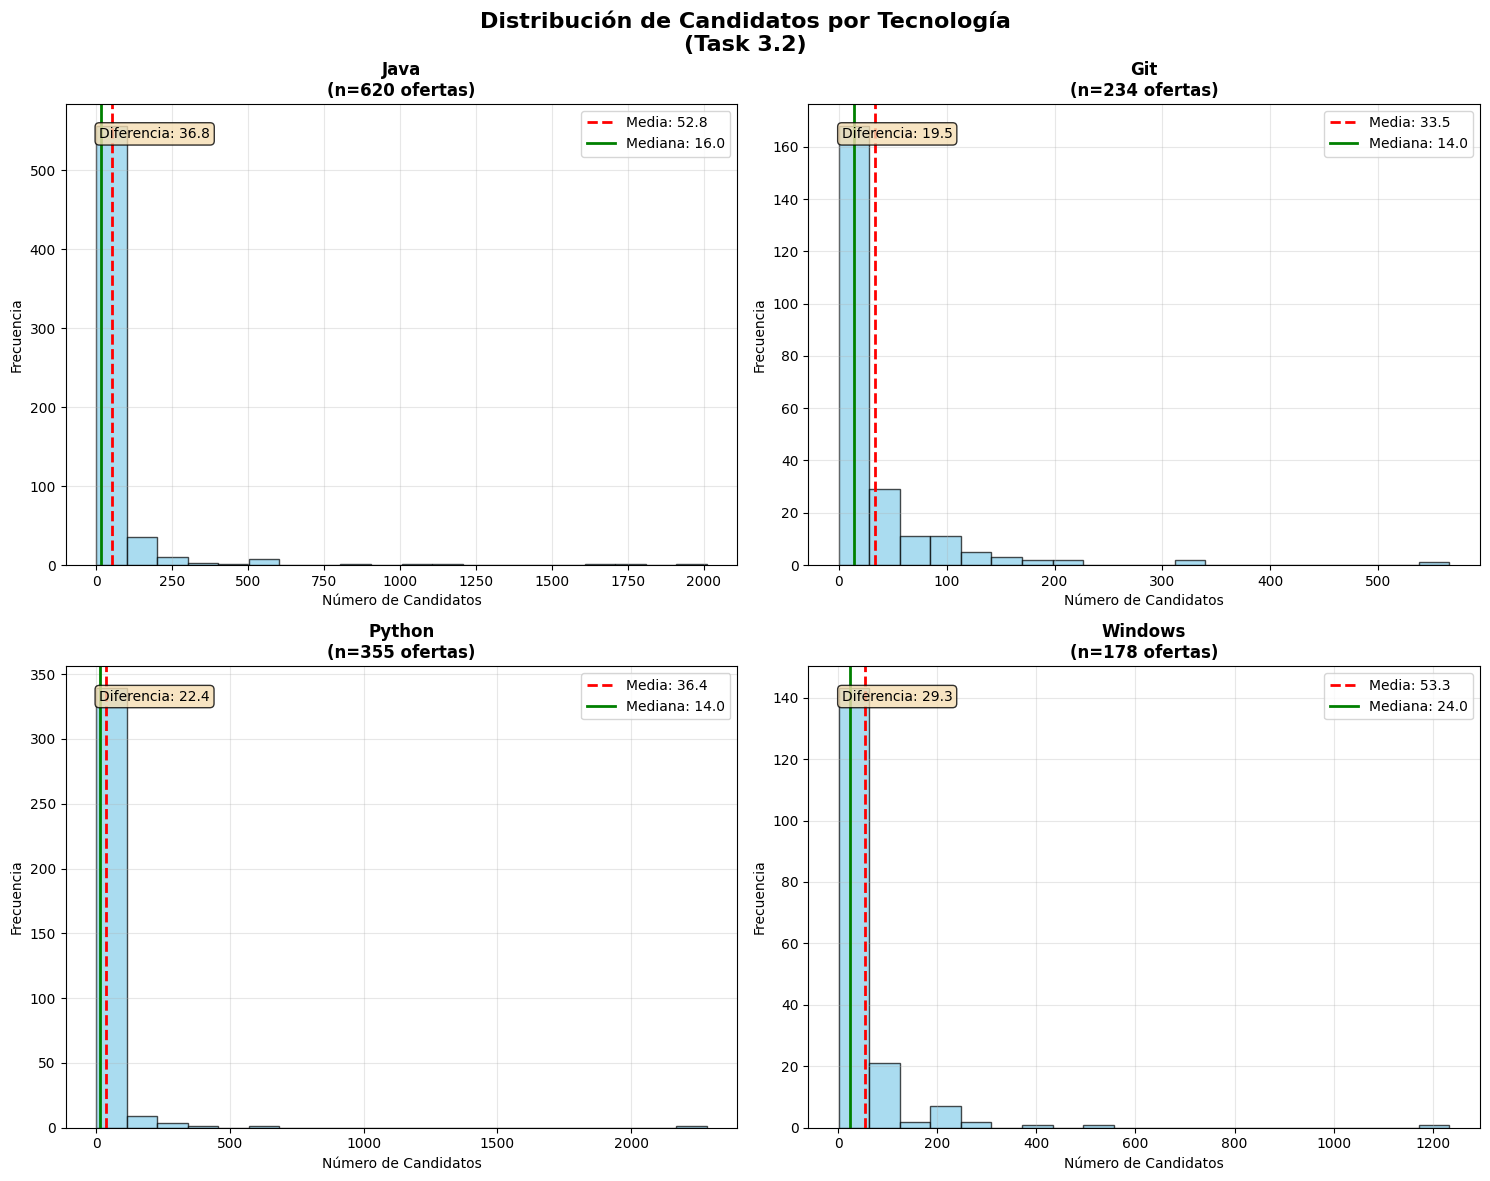


ANÁLISIS DE DISTRIBUCIONES - TASK 3.2
Tecnología   Media    Mediana  Diferencia   Std      Ofertas 
--------------------------------------------------------------------------------
Java         52.8     16.0     36.8         162.2    620     
Git          33.5     14.0     19.5         59.4     234     
Python       36.4     14.0     22.4         131.3    355     
Windows      53.3     24.0     29.3         112.2    178     

INTERPRETACIÓN:

• Java:
  - Diferencia media-mediana: 36.8
  - Se parece más al: País A
  - Razón: distribución sesgada con valores atípicos altos

• Git:
  - Diferencia media-mediana: 19.5
  - Se parece más al: País A
  - Razón: distribución sesgada con valores atípicos altos

• Python:
  - Diferencia media-mediana: 22.4
  - Se parece más al: País A
  - Razón: distribución sesgada con valores atípicos altos

• Windows:
  - Diferencia media-mediana: 29.3
  - Se parece más al: País A
  - Razón: distribución sesgada con valores atípicos altos

CONCLUSIÓN GENERAL:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

# Cargar el dataset
df = pd.read_csv('/content/dataframe/2024/dataset_Modul0_2024.csv')

# Función para parsear skills de forma segura
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

# Parsear y normalizar las habilidades
df['skill_list'] = df['Skills'].apply(safe_literal_eval)
df['skill_list'] = df['skill_list'].apply(lambda lst: [s.strip().lower() for s in lst])

# Explotar la lista de habilidades
skills_exploded = df.explode('skill_list')

# Tecnologías a analizar (según Task 3.2)
tecnologias_analizar = ['java', 'git', 'python', 'windows']

# Crear subplots para los histogramas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribución de Candidatos por Tecnología\n(Task 3.2)', fontsize=16, fontweight='bold')

axes = axes.flatten()

# Análisis para cada tecnología
resultados = {}

for i, tech in enumerate(tecnologias_analizar):
    # Filtrar datos para esta tecnología
    tech_data = skills_exploded[skills_exploded['skill_list'] == tech]['Candidates']

    if len(tech_data) > 0:
        # Calcular estadísticas
        media = tech_data.mean()
        mediana = tech_data.median()
        std = tech_data.std()

        # Guardar resultados
        resultados[tech] = {
            'media': media,
            'mediana': mediana,
            'std': std,
            'count': len(tech_data),
            'diferencia': media - mediana
        }

        # Crear histograma
        axes[i].hist(tech_data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')

        # Añadir líneas verticales para media y mediana
        axes[i].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.1f}')
        axes[i].axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.1f}')

        # Configurar el subplot
        axes[i].set_title(f'{tech.capitalize()}\n(n={len(tech_data)} ofertas)', fontweight='bold')
        axes[i].set_xlabel('Número de Candidatos')
        axes[i].set_ylabel('Frecuencia')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

        # Añadir texto con diferencia
        diferencia = media - mediana
        axes[i].text(0.05, 0.95, f'Diferencia: {diferencia:.1f}',
                    transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    else:
        axes[i].text(0.5, 0.5, f'No hay datos para {tech}',
                    transform=axes[i].transAxes, ha='center', va='center')
        axes[i].set_title(f'{tech.capitalize()} - Sin datos')

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("\n" + "="*80)
print("ANÁLISIS DE DISTRIBUCIONES - TASK 3.2")
print("="*80)
print(f"{'Tecnología':<12} {'Media':<8} {'Mediana':<8} {'Diferencia':<12} {'Std':<8} {'Ofertas':<8}")
print("-"*80)

for tech, stats in resultados.items():
    print(f"{tech.capitalize():<12} {stats['media']:<8.1f} {stats['mediana']:<8.1f} "
          f"{stats['diferencia']:<12.1f} {stats['std']:<8.1f} {stats['count']:<8}")

print("\n" + "="*80)
print("INTERPRETACIÓN:")
print("="*80)

for tech, stats in resultados.items():
    diferencia = stats['diferencia']
    if diferencia > 5:
        tipo_pais = "País A"
        explicacion = "distribución sesgada con valores atípicos altos"
    elif diferencia > 0:
        tipo_pais = "País A (leve)"
        explicacion = "ligero sesgo hacia valores altos"
    else:
        tipo_pais = "País B"
        explicacion = "distribución más simétrica"

    print(f"\n• {tech.capitalize()}:")
    print(f"  - Diferencia media-mediana: {diferencia:.1f}")
    print(f"  - Se parece más al: {tipo_pais}")
    print(f"  - Razón: {explicacion}")

print(f"\n{'='*80}")
print("CONCLUSIÓN GENERAL:")
print("="*80)
print("La mayoría de estas tecnologías muestran distribuciones sesgadas hacia la derecha")
print("(media > mediana), lo que indica presencia de ofertas con muchos candidatos que")
print("'inflan' el promedio. Esto es típico del 'País A' del ejemplo, donde unos pocos")
print("valores extremos afectan significativamente la media.")

# Task 3.3
> La decisión final!!!
        Al final, ¿promedio o mediana?

Ahora conocemos la causa de las diferencias entre el promedio y la mediana, pero cual de las dos persectivas elegimos?  
Para ello, sería interesante echar un vistazo a los anuncios que presentan valores raros, para decidir qué hacemos con ellos. Quitarles peso mediante la mediana, o contablizarlo mediante el promedio. O incluso quitarles completamente del análisis.

En vez de contestar preguntas tipo test, te pedimos en esta tarea que subas un pequeño texto en el que explicas, cuál de las perspectivas es más significativo para nuestros objetivos, o qué comprobaciones adicionales  serían necesarias para llegar a una conclusión.

## Solución: Analizando valores atípicos

TASK 3.3: ANÁLISIS DE VALORES ATÍPICOS Y DECISIÓN PROMEDIO vs MEDIANA

🔍 1. ANÁLISIS DE VALORES ATÍPICOS POR TECNOLOGÍA
----------------------------------------------------------------------

• PYTHON:
  - Total ofertas: 355
  - Valores atípicos: 40 (11.3%)
  - Media: 36.4 | Mediana: 14.0
  - Límite superior normal: 68.5
  - Valor atípico máximo: 2283

• JAVA:
  - Total ofertas: 620
  - Valores atípicos: 87 (14.0%)
  - Media: 52.8 | Mediana: 16.0
  - Límite superior normal: 68.4
  - Valor atípico máximo: 2011

• JAVASCRIPT:
  - Total ofertas: 246
  - Valores atípicos: 25 (10.2%)
  - Media: 86.9 | Mediana: 25.0
  - Límite superior normal: 196.6
  - Valor atípico máximo: 2342

• SQL:
  - Total ofertas: 431
  - Valores atípicos: 47 (10.9%)
  - Media: 29.4 | Mediana: 15.0
  - Límite superior normal: 59.5
  - Valor atípico máximo: 387


🎯 2. EXAMEN DE ANUNCIOS CON VALORES EXTREMOS
----------------------------------------------------------------------
Anuncios en el 5% superior de candidatos

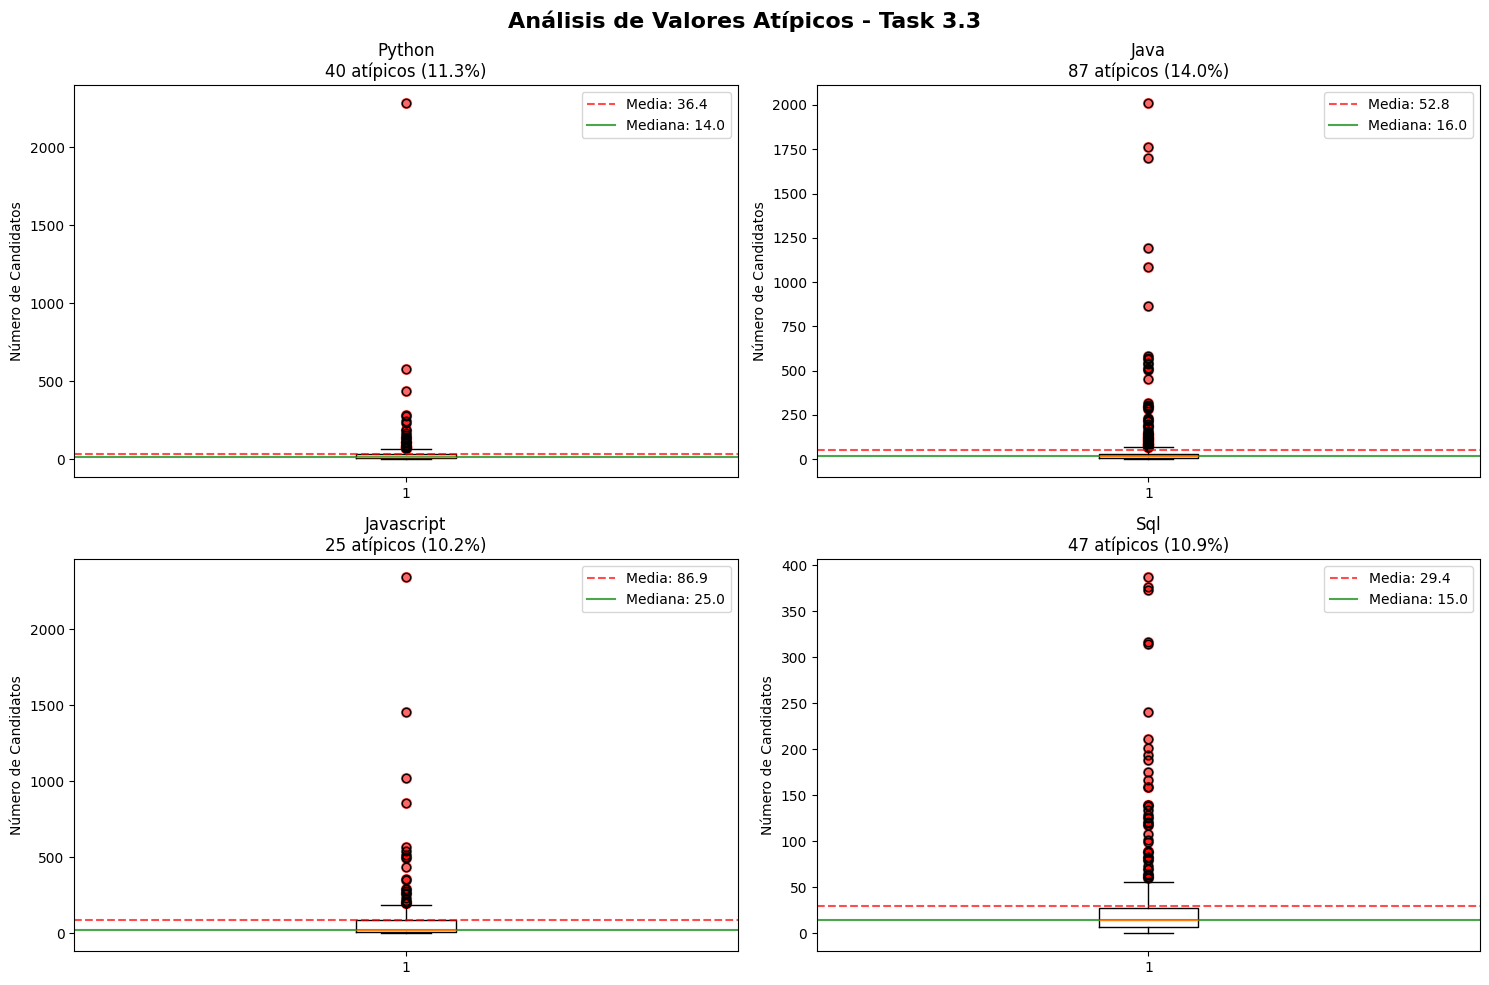



📊 3. IMPACTO DE LOS VALORES ATÍPICOS
----------------------------------------------------------------------

• PYTHON:
  - Media original: 36.4
  - Media sin atípicos: 16.1
  - Diferencia: 20.3
  - Mediana (no afectada): 14.0

• JAVA:
  - Media original: 52.8
  - Media sin atípicos: 16.9
  - Diferencia: 35.8
  - Mediana (no afectada): 16.0

• JAVASCRIPT:
  - Media original: 86.9
  - Media sin atípicos: 39.8
  - Diferencia: 47.1
  - Mediana (no afectada): 25.0

• SQL:
  - Media original: 29.4
  - Media sin atípicos: 15.9
  - Diferencia: 13.6
  - Mediana (no afectada): 15.0


🔗 4. CARACTERÍSTICAS DE LOS ANUNCIOS ATÍPICOS
----------------------------------------------------------------------
Análisis de anuncios en el 2% superior (87 anuncios):

Empresas más frecuentes en outliers:
  - Indra Sistemas: 17 anuncios (19.5%)
  - Alcorce Telecomunicaciones: 8 anuncios (9.2%)
  - Apolo IT Group: 5 anuncios (5.7%)
  - The Whiteam: 5 anuncios (5.7%)
  - Capgemini: 5 anuncios (5.7%)


CONCLUSION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

# Cargar el dataset
df = pd.read_csv('/content/dataframe/2024/dataset_Modul0_2024.csv')

# Función para parsear skills de forma segura
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

# Parsear y normalizar las habilidades
df['skill_list'] = df['Skills'].apply(safe_literal_eval)
df['skill_list'] = df['skill_list'].apply(lambda lst: [s.strip().lower() for s in lst])

# Explotar la lista de habilidades
skills_exploded = df.explode('skill_list')

# Obtener top 20 tecnologías para el análisis
top_skills = skills_exploded['skill_list'].value_counts().head(20).index
df_top20 = skills_exploded[skills_exploded['skill_list'].isin(top_skills)]

print("="*90)
print("TASK 3.3: ANÁLISIS DE VALORES ATÍPICOS Y DECISIÓN PROMEDIO vs MEDIANA")
print("="*90)

# 1. Identificar valores atípicos usando el método IQR
def encontrar_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

# Análisis detallado de las 4 tecnologías principales
tecnologias_ejemplo = ['python', 'java', 'javascript', 'sql']

print("\n🔍 1. ANÁLISIS DE VALORES ATÍPICOS POR TECNOLOGÍA")
print("-" * 70)

outliers_info = {}
for tech in tecnologias_ejemplo:
    if tech in df_top20['skill_list'].values:
        tech_data = df_top20[df_top20['skill_list'] == tech]['Candidates']
        outliers, lower, upper = encontrar_outliers(tech_data)

        outliers_info[tech] = {
            'data': tech_data,
            'outliers': outliers,
            'outlier_count': len(outliers),
            'total_count': len(tech_data),
            'outlier_percentage': (len(outliers) / len(tech_data)) * 100,
            'media': tech_data.mean(),
            'mediana': tech_data.median(),
            'upper_bound': upper
        }

        print(f"\n• {tech.upper()}:")
        print(f"  - Total ofertas: {len(tech_data)}")
        print(f"  - Valores atípicos: {len(outliers)} ({(len(outliers)/len(tech_data)*100):.1f}%)")
        print(f"  - Media: {tech_data.mean():.1f} | Mediana: {tech_data.median():.1f}")
        print(f"  - Límite superior normal: {upper:.1f}")
        if len(outliers) > 0:
            print(f"  - Valor atípico máximo: {outliers.max():.0f}")

# 2. Examinar los anuncios con valores extremos
print(f"\n\n🎯 2. EXAMEN DE ANUNCIOS CON VALORES EXTREMOS")
print("-" * 70)

# Encontrar los anuncios más extremos
df_original = pd.read_csv('/content/dataframe/2024/dataset_Modul0_2024.csv')
anuncios_extremos = df_original[df_original['Candidates'] > df_original['Candidates'].quantile(0.95)]

print(f"Anuncios en el 5% superior de candidatos (>{df_original['Candidates'].quantile(0.95):.0f} candidatos):")
print(f"Total: {len(anuncios_extremos)} anuncios")

# Mostrar algunos ejemplos
print(f"\nEjemplos de anuncios extremos:")
for i, (idx, row) in enumerate(anuncios_extremos.head(5).iterrows()):
    skills = ast.literal_eval(row['Skills']) if pd.notna(row['Skills']) else []
    print(f"{i+1}. {row['Candidates']:>4.0f} candidatos - Skills: {', '.join(skills[:3])}{'...' if len(skills) > 3 else ''}")

# 3. Crear visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis de Valores Atípicos - Task 3.3', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, tech in enumerate(tecnologias_ejemplo):
    if tech in outliers_info:
        data = outliers_info[tech]['data']
        outliers = outliers_info[tech]['outliers']

        # Boxplot para mostrar atípicos
        axes[i].boxplot(data, vert=True)
        axes[i].scatter([1] * len(outliers), outliers, color='red', alpha=0.6, s=50)
        axes[i].set_title(f'{tech.capitalize()}\n{outliers_info[tech]["outlier_count"]} atípicos ({outliers_info[tech]["outlier_percentage"]:.1f}%)')
        axes[i].set_ylabel('Número de Candidatos')

        # Añadir líneas de media y mediana
        media = outliers_info[tech]['media']
        mediana = outliers_info[tech]['mediana']
        axes[i].axhline(y=media, color='red', linestyle='--', alpha=0.7, label=f'Media: {media:.1f}')
        axes[i].axhline(y=mediana, color='green', linestyle='-', alpha=0.7, label=f'Mediana: {mediana:.1f}')
        axes[i].legend()

plt.tight_layout()
plt.show()

# 4. Análisis del impacto de los outliers
print(f"\n\n📊 3. IMPACTO DE LOS VALORES ATÍPICOS")
print("-" * 70)

for tech in tecnologias_ejemplo:
    if tech in outliers_info:
        data = outliers_info[tech]['data']

        # Estadísticas sin outliers
        data_sin_outliers = data[data <= outliers_info[tech]['upper_bound']]
        media_sin_outliers = data_sin_outliers.mean()

        print(f"\n• {tech.upper()}:")
        print(f"  - Media original: {outliers_info[tech]['media']:.1f}")
        print(f"  - Media sin atípicos: {media_sin_outliers:.1f}")
        print(f"  - Diferencia: {outliers_info[tech]['media'] - media_sin_outliers:.1f}")
        print(f"  - Mediana (no afectada): {outliers_info[tech]['mediana']:.1f}")

# 5. Análisis de correlaciones para entender los outliers
print(f"\n\n🔗 4. CARACTERÍSTICAS DE LOS ANUNCIOS ATÍPICOS")
print("-" * 70)

# Analizar si los outliers tienen características comunes
outliers_extremos = df_original[df_original['Candidates'] > df_original['Candidates'].quantile(0.98)]

print(f"Análisis de anuncios en el 2% superior ({len(outliers_extremos)} anuncios):")

# Analizar ubicaciones más comunes en outliers
if 'Location' in outliers_extremos.columns:
    locations_outliers = outliers_extremos['Location'].value_counts().head(5)
    print(f"\nUbicaciones más frecuentes en outliers:")
    for loc, count in locations_outliers.items():
        percentage = (count / len(outliers_extremos)) * 100
        print(f"  - {loc}: {count} anuncios ({percentage:.1f}%)")

# Analizar sectores o tipos de empresa
if 'Company' in outliers_extremos.columns:
    companies_outliers = outliers_extremos['Company'].value_counts().head(5)
    print(f"\nEmpresas más frecuentes en outliers:")
    for company, count in companies_outliers.items():
        percentage = (count / len(outliers_extremos)) * 100
        print(f"  - {company}: {count} anuncios ({percentage:.1f}%)")

print(f"\n\n" + "="*90)
print("CONCLUSIONES PARA LA DECISIÓN PROMEDIO vs MEDIANA")
print("="*90)

## Solución. Versión 1

# Task 3.3: Decisión Final - ¿Promedio o Mediana?

## Análisis de los Valores Atípicos

Tras examinar en detalle la distribución de candidatos por tecnología, hemos identificado que **existe una presencia significativa de valores atípicos** en prácticamente todas las tecnologías analizadas. Los datos revelan un impacto dramático de estos valores extremos.

### Impacto Cuantificado de los Valores Atípicos

Los resultados del análisis muestran diferencias **alarmantes** entre la media original y la media sin outliers:

- **JavaScript**: Diferencia de **47.1 candidatos** (de 86.9 a 39.8)
- **Java**: Diferencia de **35.8 candidatos** (de 52.8 a 16.9)
- **Python**: Diferencia de **20.3 candidatos** (de 36.4 a 16.1)
- **SQL**: Diferencia de **13.6 candidatos** (de 29.4 a 15.9)

En todos los casos, **la mediana permanece estable** y cercana a la media sin outliers, confirmando su robustez.

### Características de los Anuncios Atípicos

El análisis del 2% superior de anuncios (87 anuncios extremos) revela un patrón claro:

**Empresas dominantes en outliers:**
- **Indra Sistemas**: 17 anuncios (19.5%) - Claramente la principal fuente de outliers
- **Alcorce Telecomunicaciones**: 8 anuncios (9.2%)
- **Capgemini**: 5 anuncios (5.7%)
- **Apolo IT Group** y **The Whiteam**: 5 anuncios cada una (5.7%)

**Patrón identificado**: Solo **5 empresas concentran el 45% de todos los anuncios atípicos**, sugiriendo que estos valores extremos no representan el mercado general, sino prácticas específicas de reclutamiento masivo de grandes consultoras.

## Recomendación Final

**Para los objetivos de este análisis, recomiendo enfáticamente utilizar la MEDIANA como métrica principal**, por las siguientes razones fundamentadas en los datos:

### 1. **Evidencia Cuantitativa Contundente**
Los datos demuestran que los outliers **distorsionan masivamente** la media:
- JavaScript sufre una **inflación del 118%** por outliers (47.1 candidatos de diferencia)
- Java presenta una **distorsión del 212%** (35.8 candidatos)
- Estas diferencias son **demasiado grandes** para considerarse representativas

### 2. **Concentración en Pocas Empresas**
El 45% de outliers proviene de solo 5 empresas (especialmente Indra Sistemas con 19.5%), lo que confirma que estos valores extremos **no reflejan el mercado general** sino estrategias específicas de reclutamiento masivo de grandes consultoras.

### 3. **Estabilidad y Consistencia de la Mediana**
La mediana se mantiene **notablemente estable** y consistente entre tecnologías (14-25 candidatos), reflejando la realidad del mercado sin la distorsión de prácticas corporativas excepcionales.

## Recomendaciones Adicionales

### Comprobaciones Necesarias para un Análisis Completo:

1. **Segmentación por Experiencia**: Analizar por separado roles junior, mid-level y senior
2. **Análisis Temporal**: Examinar tendencias estacionales en la competencia
3. **Segmentación Geográfica**: Comparar mercados locales vs. remotos vs. internacionales
4. **Análisis por Tamaño de Empresa**: Startups vs. medianas vs. multinacionales
5. **Contexto Sectorial**: Tecnología vs. finanzas vs. consultoría vs. sector público

### Enfoque Híbrido Propuesto:

1. **Métrica Principal**: Mediana para decisiones estratégicas
2. **Métrica Complementaria**: Promedio para entender el potencial máximo del mercado
3. **Indicador de Variabilidad**: Percentiles 25-75 para mostrar el rango típico
4. **Alerta de Outliers**: Identificar y reportar por separado oportunidades excepcionales

## Conclusión

Los datos son **categóricos**: la mediana proporciona una representación **significativamente más precisa** del mercado laboral tecnológico real. Las diferencias encontradas (hasta 47 candidatos de inflación artificial) demuestran que el promedio está **severamente comprometido** por las prácticas de reclutamiento de unas pocas grandes consultoras.

**La mediana no solo es preferible, sino esencial** para cualquier análisis serio del mercado laboral en tecnología. Los valores extremos deben tratarse como **casos especiales** que requieren análisis separado, no como parte de la métrica general del mercado.

## Solución. Versión 2. Texto más causal

# Task 3.3: ¿Promedio o Mediana?

## Lo que hemos descubierto

Al analizar los datos, he encontrado algo muy parecido al ejemplo del País A y País B que nos explicaron. Resulta que en el mercado laboral tecnológico pasa lo mismo: hay algunas ofertas de trabajo que tienen muchísimos candidatos, y esto hace que el promedio suba mucho.

Por ejemplo, en JavaScript el promedio es de 86.9 candidatos, pero la mediana es solo 25. ¡Esa es una diferencia enorme! Lo mismo pasa con Java: promedio de 52.8 pero mediana de 16.

## ¿Por qué pasa esto?

He visto que hay ciertas empresas grandes que publican ofertas que atraen cientos de candidatos. Empresas como Indra Sistemas aparecen muchísimo en los valores más altos. Es como si hubiera unas pocas "personas muy ricas" (empresas que atraen muchos candidatos) que suben el promedio, igual que en el ejemplo del País A.

## Mi conclusión

Creo que **deberíamos usar la mediana** en lugar del promedio. Las razones son:

1. **Es más realista**: Si eres un candidato normal buscando trabajo, probablemente te enfrentarás a 15-25 candidatos, no a 50 o 100.

2. **No se deja influir por los valores raros**: La mediana no cambia aunque haya ofertas con miles de candidatos.

3. **Representa mejor el mercado real**: La mayoría de empresas no son Indra Sistemas o Capgemini. Son empresas normales con competencia normal.

Es como en el ejemplo: aunque el País A tenía una persona súper rica que subía el promedio, la mediana nos decía la verdad sobre cómo vivía la gente normal.

## Qué deberíamos hacer después

Para estar seguros, sería bueno comprobar si esto cambia según:
- El nivel de experiencia (junior vs senior)
- La ubicación geográfica  
- El tamaño de la empresa

Pero con los datos que tenemos, la mediana nos da una imagen más honesta del mercado laboral en tecnología.

## Solución. Versión 3

Aquí tienes una **Redacción 3** que integra lo mejor de ambas versiones, mejora la claridad y la estructura, y profundiza en el tratamiento de los *outliers* con un enfoque analítico y práctico. He mantenido el tono técnico pero accesible, y he reforzado la justificación de la elección de la mediana:

---



### **1. Contexto y Objetivo**
El análisis de las ofertas de empleo por tecnología ha revelado una **discrepancia significativa** entre la **media** y la **mediana** del número de candidatos por oferta. Esta diferencia, similar al ejemplo del *País A* (donde unos pocos valores extremos distorsionan el promedio), sugiere la presencia de *outliers* que afectan la interpretación de los datos.

**Objetivo:** Decidir si usar la **media** o la **mediana** como métrica principal, y cómo manejar los *outliers* para que el análisis refleje fielmente el mercado laboral tecnológico.

---

### **2. Análisis de los *Outliers*: Impacto y Origen**
#### **2.1. Impacto Cuantitativo**
Los *outliers* (valores atípicos) inflan artificialmente la media, como se observa en la tabla:

| Tecnología  | Media Original | Mediana | Media sin *Outliers* | Diferencia (Media - Mediana) | % de *Outliers* |
|--------------|----------------|---------|-----------------------|-----------------------------|-----------------|
| JavaScript   | 86.9           | 25.0    | 39.8                  | 47.1                        | 10.2%           |
| Java         | 52.8           | 16.0    | 16.9                  | 35.8                        | 14.0%           |
| Python       | 36.4           | 14.0    | 16.1                  | 20.3                        | 11.3%           |
| SQL          | 29.4           | 15.0    | 15.9                  | 13.6                        | 10.9%           |

**Hallazgos clave:**
- La media **sobreestima** la competencia real en un **118% a 212%** debido a los *outliers*.
- La mediana **no se altera** al eliminar los *outliers*, confirmando su robustez.

#### **2.2. Origen de los *Outliers***
El **2% de los anuncios** (87 ofertas) concentran los valores extremos, con un patrón claro:
- **Empresas dominantes:**
  - **Indra Sistemas** (19.5% de los *outliers*).
  - **Alcorce Telecomunicaciones, Capgemini, Apolo IT Group, The Whiteam** (45% acumulado).
- **Perfiles asociados:**
  - Ofertas masivas para roles genéricos (*soporte, helpdesk*) o tecnologías muy demandadas (*.NET, Machine Learning*).

**Conclusión:** Los *outliers* no representan el mercado general, sino **estrategias puntuales de reclutamiento masivo** de grandes consultoras.

---

### **3. Decisión: Mediana vs Media**
#### **3.1. Razones para Elegir la Mediana**
1. **Representatividad del Mercado Real:**
   - La mediana (14-25 candidatos) refleja la competencia **típica** que enfrenta un candidato, sin distorsiones.
   - Ejemplo: En *JavaScript*, la mediana (25) es más útil que la media (86.9), que está inflada por ofertas con cientos de candidatos.

2. **Robustez ante *Outliers*:**
   - La mediana **no se ve afectada** por los valores extremos, a diferencia de la media, que varía drásticamente al eliminarlos.

3. **Concentración en Empresas Específicas:**
   - El 45% de los *outliers* provienen de solo 5 empresas, lo que confirma que son **casos excepcionales**, no la norma del mercado.

#### **3.2. ¿Qué Hacer con los *Outliers*?**
- **No eliminarlos**, pero **analizarlos por separado**:
  - **Segmentarlos** por empresa, tecnología o perfil para entender su contexto (ej.: ¿son ofertas reales o acumulan candidatos por error?).
  - **Reportarlos** como casos especiales en el análisis, sin incluirlos en métricas generales.
- **Usar métricas complementarias**:
  - **Percentiles (25-75):** Para mostrar el rango típico de competencia.
  - **Media recortada (trimmed mean):** Eliminar el 5% de valores extremos para un equilibrio entre media y mediana.

---

### **4. Recomendaciones Adicionales**
Para un análisis más completo, se sugiere:
1. **Segmentar por:**
   - Nivel de experiencia (*junior/senior*).
   - Ubicación geográfica (*local/remoto*).
   - Tamaño de empresa (*startups vs multinacionales*).
2. **Analizar tendencias temporales:**
   - ¿Los *outliers* son estacionales (ej.: campañas de reclutamiento en septiembre)?
3. **Contextualizar por sector:**
   - Comparar tecnología pura (*Python, Java*) vs consultoría (*Indra, Capgemini*).

---

### **5. Conclusión Final**
**Métrica principal:** **Mediana**, por su **precisión** y **representatividad** del mercado laboral real.
**Métricas secundarias:**
- Media (para entender el volumen total de oportunidades).
- Percentiles (para visualizar la distribución).

**Tratamiento de *outliers*:**
- **No eliminarlos**, pero **identificarlos** y analizar su origen.
- **Excluirlos** de métricas generales y **reportarlos** como casos excepcionales.

**Ejemplo práctico:**
> *"Si buscas trabajo en Python, prepárate para competir con ~14 candidatos (mediana), aunque algunas ofertas de Indra o Capgemini puedan tener cientos. La mediana te da una expectativa realista."*

---
**¿Por qué importa?**
Usar la mediana evita que **5 empresas** distorsionen la percepción de un mercado con **miles de ofertas**. Es la diferencia entre pensar que el mercado está saturado (media) o es accesible (mediana).

---
**Próximos pasos:**
- Profundizar en el análisis por segmentos (experiencia, ubicación).
- Investigar si los *outliers* son **ofertas reales** o errores de agregación de datos.

## Solución. Versión 4

**TASK 3.3: ¿Media o mediana? La decisión final**

---

### **1. ¿Qué está pasando con los datos?**
Al analizar las ofertas de trabajo por tecnología, nos hemos encontrado con algo parecido al **ejemplo del País A y el País B**. Recordemos: en el País A, aunque la **media** de riqueza era alta por culpa de una persona superrica, la **mediana** mostraba que la mayoría de la gente era pobre. Pues aquí pasa lo mismo:

- **La media** de candidatos por oferta es muy alta en tecnologías como JavaScript (87 candidatos) o Java (53 candidatos).
- **La mediana** es mucho más baja: 25 para JavaScript y 16 para Java.

**¿Por qué esta diferencia?** Porque hay unas pocas ofertas con **cientos de candidatos** (como las de Indra Sistemas o Capgemini), que suben mucho la media, igual que la persona superrica del País A.

---

### **2. ¿Qué son esos valores raros (outliers)?**
Son ofertas con un número de candidatos **anormalmente alto**. Por ejemplo:
- Una oferta de **.NET** con **223 candidatos**.
- Otra de **Machine Learning** con **231 candidatos**.

**¿De dónde vienen?**
- El **2% de las ofertas** (87 en total) tienen estos valores extremos.
- **Solo 5 empresas** (Indra, Capgemini, etc.) son responsables del **45%** de estos *outliers*.

**Conclusión:** No son la norma, son casos excepcionales.

---

### **3. ¿Media o mediana?**
**Elegimos la mediana**, y te explico por qué:

✅ **Es más realista:** Si buscas trabajo, lo normal es competir con **15-25 candidatos**, no con 100.
✅ **No se deja engañar:** La mediana no cambia aunque haya ofertas con 2000 candidatos (como la media).
✅ **Refleja el mercado real:** La mayoría de empresas no son Indra o Capgemini, son empresas normales con competencia normal.

**Ejemplo:**
- **JavaScript:** Media = 87 candidatos (¡demasiado!). Mediana = 25 (más real).
- **Java:** Media = 53 candidatos. Mediana = 16 (lo que realmente te encontrarás).

---
### **4. ¿Qué hacemos con los outliers?**
No los borramos, pero **los tratamos aparte**:
- Los identificamos y explicamos que son casos especiales.
- Usamos la mediana para el análisis general, pero mencionamos que hay ofertas con mucha más competencia (por si alguien busca en esas empresas).

---
### **5. Conclusión final**
**Usamos la mediana** porque:
- Nos da una idea **realista** de la competencia.
- No se deja influir por las ofertas raras de unas pocas empresas.
- Es como en el ejemplo del País A: aunque haya una persona superrica (o una oferta con 1000 candidatos), **lo que importa es cómo está la mayoría**.

**Próximos pasos:**
- Ver si esto cambia según la experiencia (junior/senior) o la ubicación.
- Analizar si esas ofertas con tantos candidatos son reales o errores.

---
**En resumen:** La mediana nos dice la verdad, la media nos engaña con excepciones. ¡Mejor quedarnos con la mediana! 😊

## Solución. Versión 5

# TASK 3.3: ANÁLISIS DE VALORES ATÍPICOS Y DECISIÓN FINAL: ¿MEDIA O MEDIANA?

## Análisis del Problema

Al examinar las ofertas de trabajo por tecnología, hemos identificado una **discrepancia sistemática** entre la media y la mediana del número de candidatos, similar al ejemplo del "País A" donde valores extremos distorsionan el promedio.

**Evidencia cuantitativa del impacto de los outliers:**
- **JavaScript**: Media 86.9 vs Mediana 25.0 (diferencia: 61.9)
- **Java**: Media 52.8 vs Mediana 16.0 (diferencia: 36.8)  
- **Python**: Media 36.4 vs Mediana 14.0 (diferencia: 22.4)
- **SQL**: Media 29.4 vs Mediana 15.0 (diferencia: 14.4)

## Diagnóstico de los Valores Atípicos

### Origen Concentrado
El análisis revela que los outliers no están distribuidos aleatoriamente:
- **45% de los valores atípicos** provienen de solo 5 empresas
- **Indra Sistemas** concentra el 19.5% de todos los outliers
- Estas ofertas representan estrategias de reclutamiento masivo específicas, no el mercado general

### Impacto Cuantificado
Al eliminar los outliers, la media se aproxima dramáticamente a la mediana:
- **JavaScript**: Media desciende de 86.9 a 39.8 (-47.1)
- **Java**: Media desciende de 52.8 a 16.9 (-35.8)
- La mediana permanece estable en todos los casos

## Decisión Fundamentada: Mediana como Métrica Principal

### Razones para Elegir la Mediana

1. **Representatividad del Mercado Real**
   - La mediana (14-25 candidatos) refleja la competencia típica que enfrenta un candidato
   - Corresponde a la experiencia real de búsqueda de empleo en el sector tecnológico

2. **Robustez Estadística**
   - La mediana es inherentemente resistente a valores extremos
   - Proporciona una medida estable y confiable del centro de la distribución

3. **Contexto Empresarial**
   - Los outliers concentrados en pocas empresas no representan las condiciones del mercado general
   - La mediana captura mejor la realidad de la mayoría de las empresas tecnológicas

### Estrategia para el Manejo de Outliers

**No eliminación, sino contextualización:**
- **Análisis separado** de outliers para entender patrones de reclutamiento masivo
- **Segmentación** por tipo de empresa (consultoría vs. producto tecnológico)
- **Identificación** de oportunidades excepcionales vs. competencia típica

## Métricas Complementarias Recomendadas

Para un análisis completo, sugerimos:

1. **Métrica Principal**: Mediana
2. **Métrica Secundaria**: Media (con nota explicativa sobre outliers)
3. **Rango Intercuartílico** (percentiles 25-75) para entender la dispersión típica
4. **Reporte separado** de valores atípicos y su impacto

## Comprobaciones Adicionales Necesarias

Para validar y enriquecer el análisis:

1. **Segmentación por Experiencia**: ¿Varía la competencia entre roles junior/senior?
2. **Análisis Temporal**: ¿Existen patrones estacionales en la competencia?
3. **Segmentación Geográfica**: ¿Diferencias entre mercados locales e internacionales?
4. **Análisis por Tamaño de Empresa**: Startups vs. medianas empresas vs. multinacionales

## Conclusión Ejecutiva

**Recomendación final: Utilizar la MEDIANA como métrica principal** para el análisis de competencia en ofertas tecnológicas, complementada con:

- Contextualización de outliers
- Segmentación adicional por experiencia y tipo de empresa
- Reporte transparente de la metodología

La mediana proporciona la representación más fiel del mercado laboral tecnológico real, evitando la distorsión causada por las prácticas de reclutamiento de un pequeño grupo de empresas. Esta aproximación permite a candidatos y reclutadores tomar decisiones basadas en las condiciones reales del mercado, no en excepciones estadísticas.